<a href="https://colab.research.google.com/github/realonbebeto/BigMart-Analysis/blob/main/Bigmart_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bigmart Exploratory Data Analysis and Sales Prediction**

Introduction
The study invloves EDA and Sales prediction from Bigmart Data. The study will involve:


1.   Getting the Data
2.   Exploring the Data

1.   Data Processing
2.   Exploring Models and Selecting the Best

## **Getting the Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Necessary Files

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MLData/bigmart_data.csv')
df_test = pd.read_csv('/content/drive/MyDrive/MLData/test.csv')

# df = pd.read_csv('bigmart_data.csv')
# df_test = pd.read_csv('test.csv')

df.shape, df_test.shape

((8523, 12), (5681, 11))

## **Exploring the Data**

In [ ]:
df.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

(None, None)

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Exploration of Numerical Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec3755c0d0>,
      dtype=object)

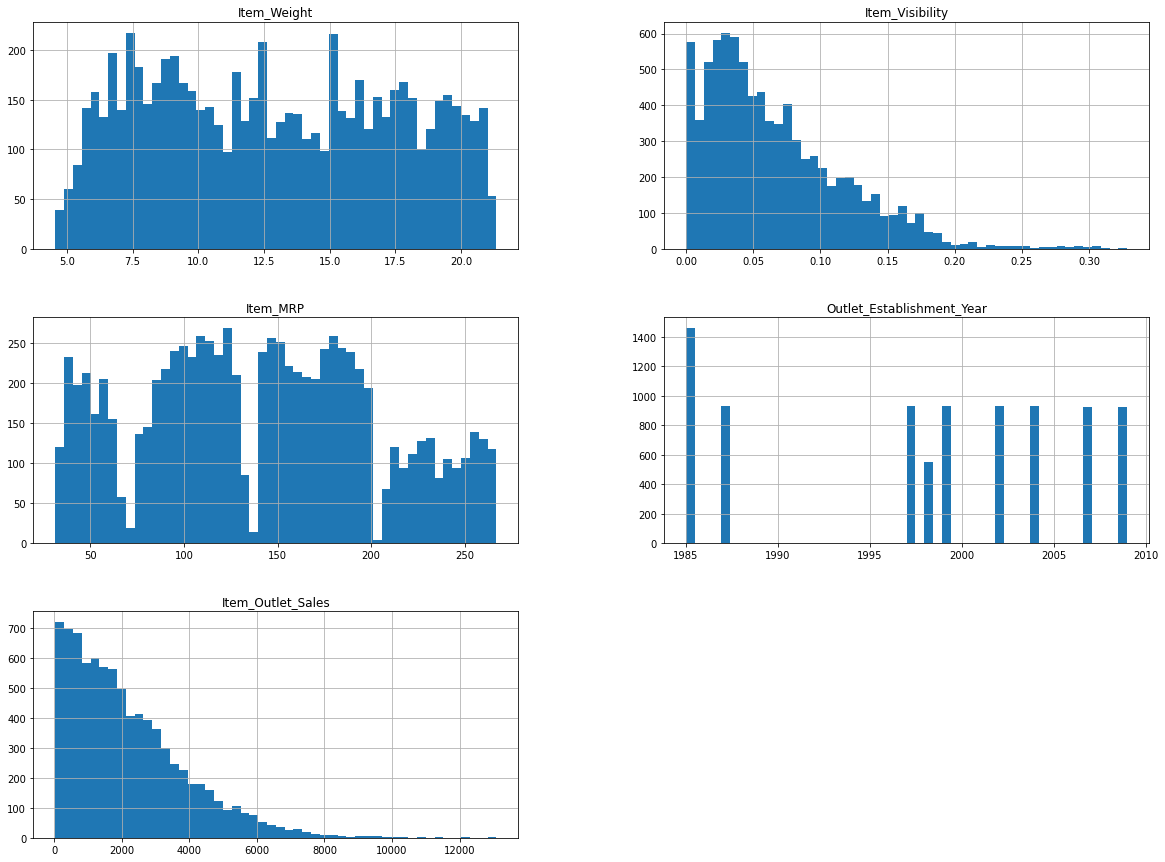

In [ ]:
df.hist(bins=50, figsize=(20, 15))

In [ ]:
def check_skew(X, attrib):
  for i in attrib:
    print(i, X[i].skew())

In [ ]:
attribs = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

check_skew(df, attrib=attribs)

Item_Weight 0.0824262091221237
Item_Visibility 1.1670905496918407
Item_MRP 0.1272022683110526
Item_Outlet_Sales 1.1775306028542798


Therefore only `Item_Outlet_Sales` and `Item_Visibility` will need scaling and *log transformation* will be done on them because their distribution is less normal.

#### Exploration of Categorical Features



1.   **`Item_Fat_Content`**



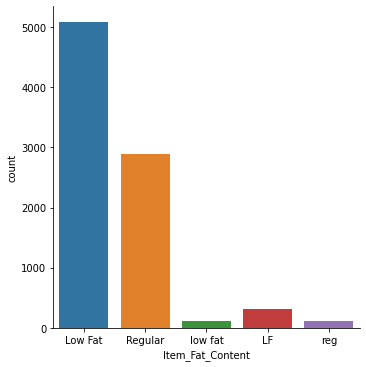

In [ ]:
sns.catplot(x='Item_Fat_Content', kind='count', data=df)

Low Fat, low fat and LF are the same
Regular and reg are the same
Therefore immediate response is editing of the DataFrame for both the test and train(df)

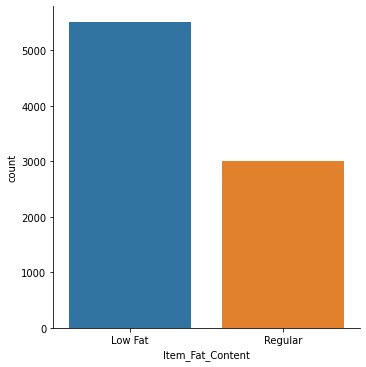

In [ ]:
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat':'Low Fat'}, inplace=True)
df_test['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat':'Low Fat'}, inplace=True)
sns.catplot(x='Item_Fat_Content', kind='count', data=df)

  2. **`Item_Type`**

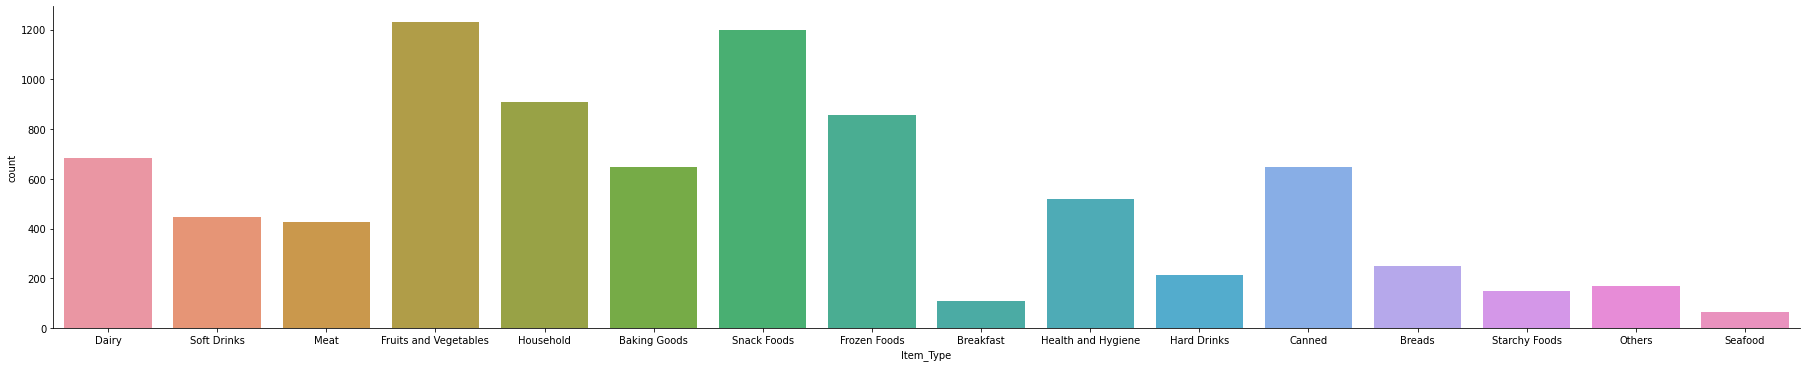

In [ ]:
sns.catplot(data = df, x='Item_Type', kind='count', aspect=5)

There are several types and with ML there is need to reduce the curse of dimensionality by categorising the types e.g perishable and non-perishable

  3. **`Outlet_Identifier`**

In [ ]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

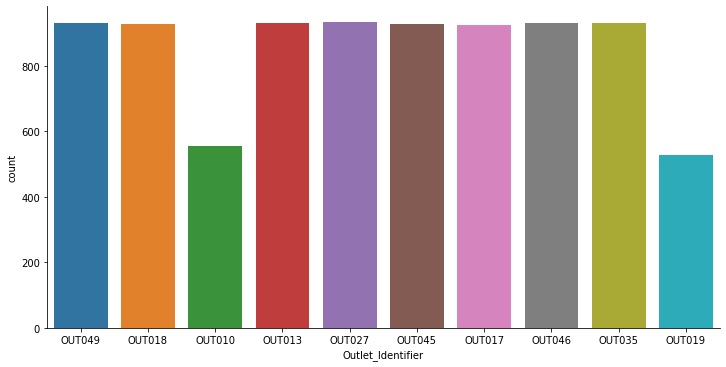

In [ ]:
sns.catplot(kind='count', x='Outlet_Identifier', data=df, aspect=2)

Outlets of identifier OUT010 and OUT019 share the almost equal number of items bought. 

  4. **`Outlet_Size`**

In [ ]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

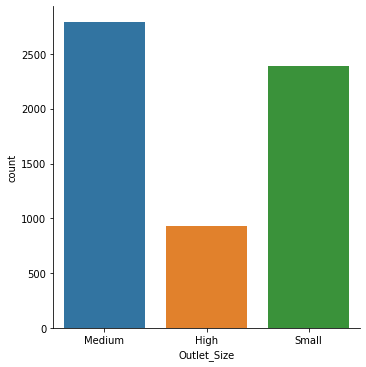

In [ ]:
sns.catplot(kind='count', x='Outlet_Size', data=df)

  5. **`Outlet_Establishment_Year`**

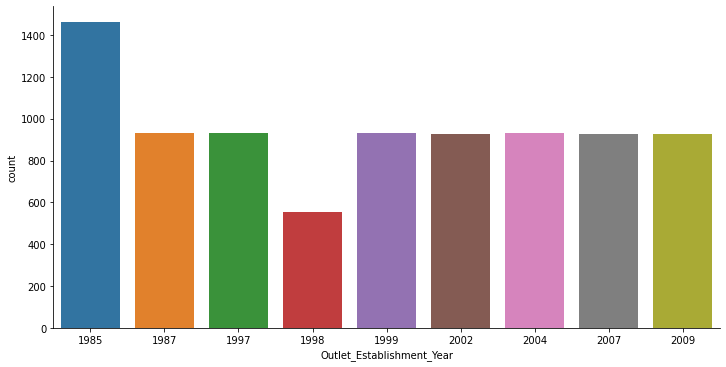

In [ ]:
sns.catplot(data=df, kind='count', x='Outlet_Establishment_Year', aspect=2)

  6. **`Outlet_Type`**

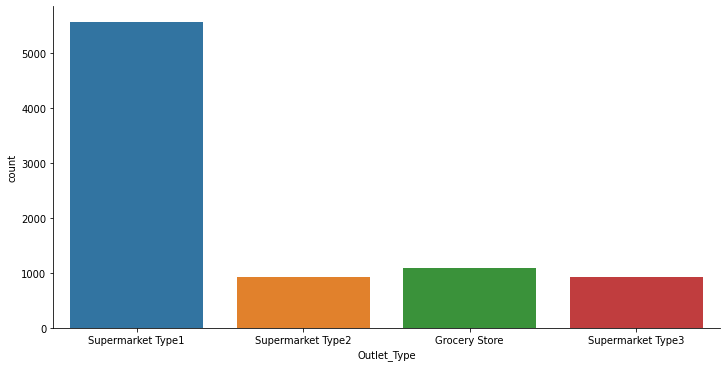

In [ ]:
sns.catplot(data=df, kind='count', x='Outlet_Type', aspect=2)

#### Relationship between Independent Numerical Features and `Item_Outlet_Sales`

  1. **`Item_Weight`**

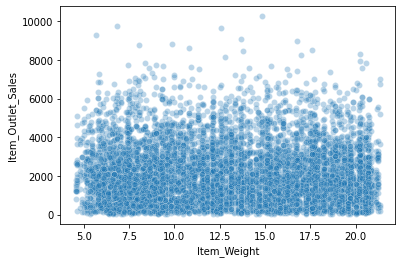

In [ ]:
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df, alpha=0.3)

  2. **`Item_Visibility`**

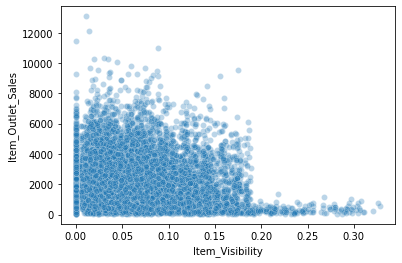

In [ ]:
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df, alpha=0.3)

   3. **`Item_MRP`**

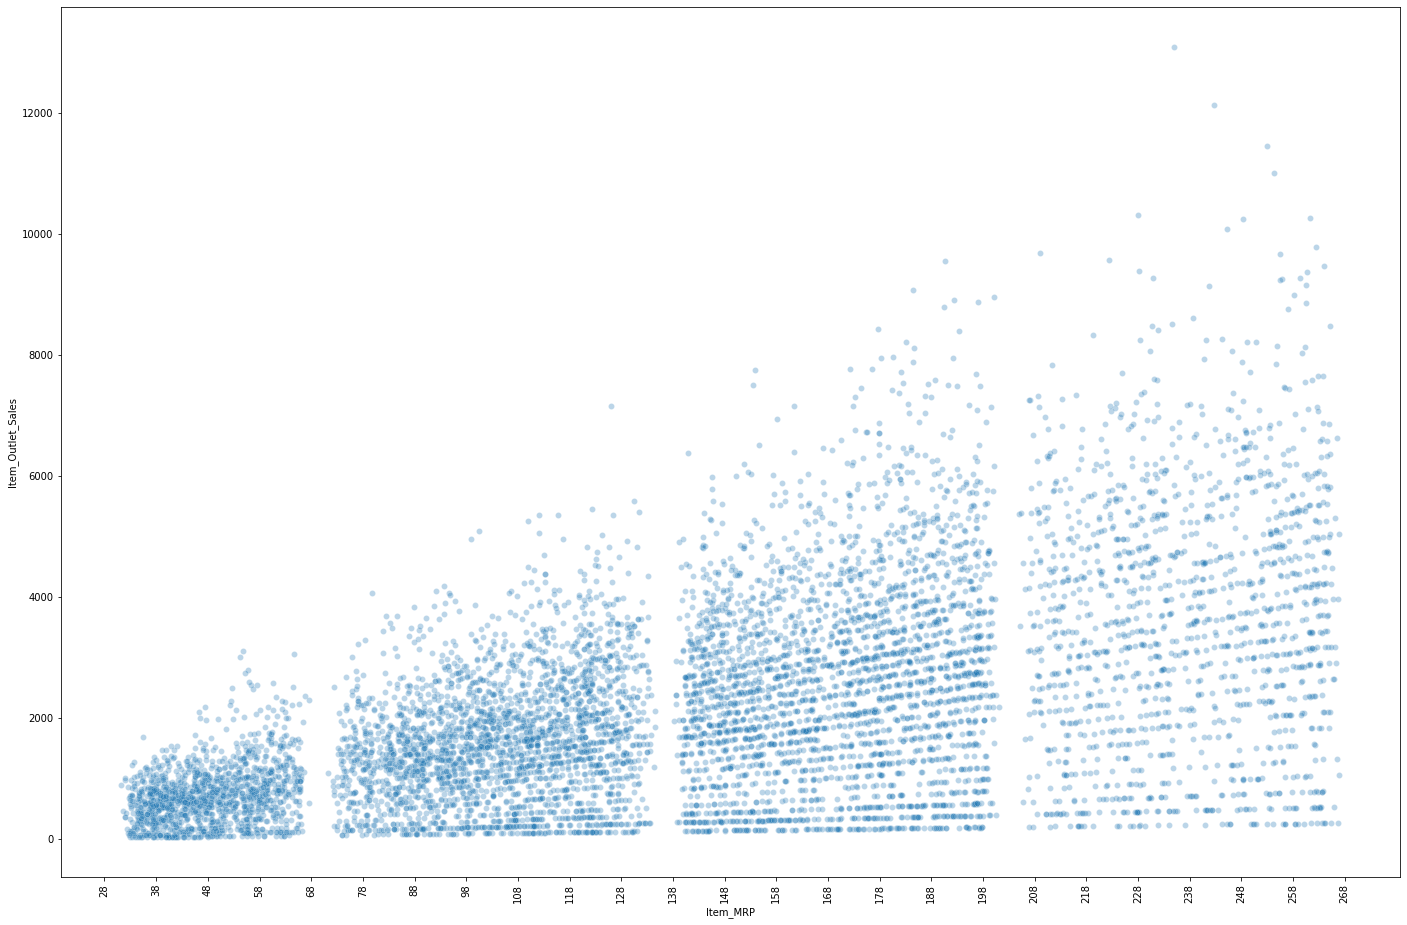

In [ ]:
plt.figure(figsize=(24, 16))
g = sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, alpha=0.3,)
g.set_xticks(np.arange(28, 270, 10))
g.set_xticklabels(np.arange(28, 270, 10), rotation=90)
plt.show()

   **Observations**
1. For `Item_Visibility` it is strange for it to be zero.
2. For `Item_MRP` there are classes in relation to the `Item_Outlet_Sales` which will help us engineer a feature

#### Relationship between Independent Categorical Features and `Item_Outlet_Sales`

   1. **`Item_Fat_Content`**

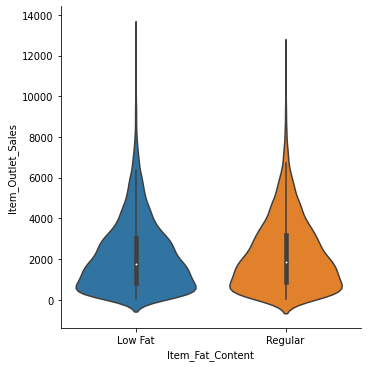

In [ ]:
sns.catplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=df, kind='violin')

   2. **`Item_Type`**

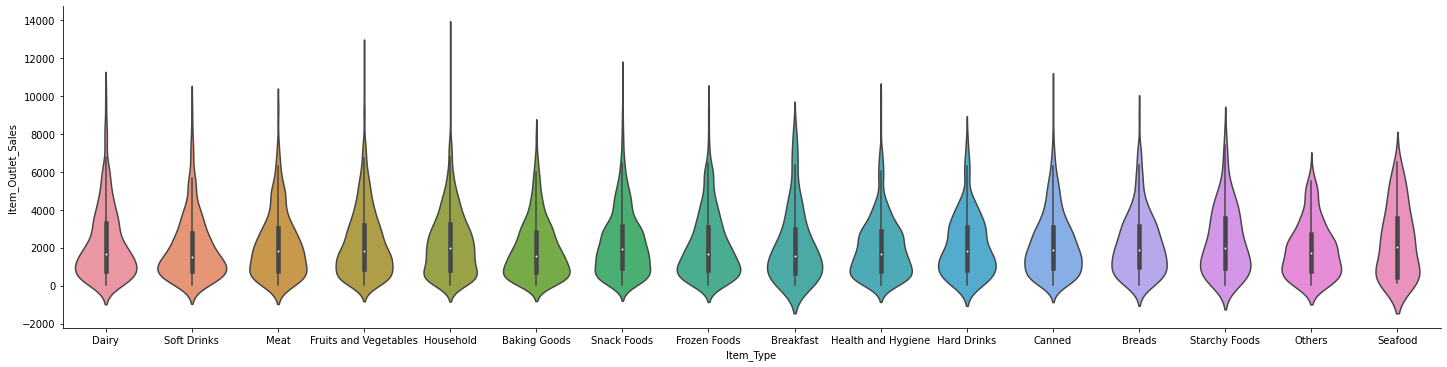

In [ ]:
sns.catplot(x='Item_Type', y='Item_Outlet_Sales', kind='violin', data=df, aspect=4)

   3. **`Outlet_Identifier`**

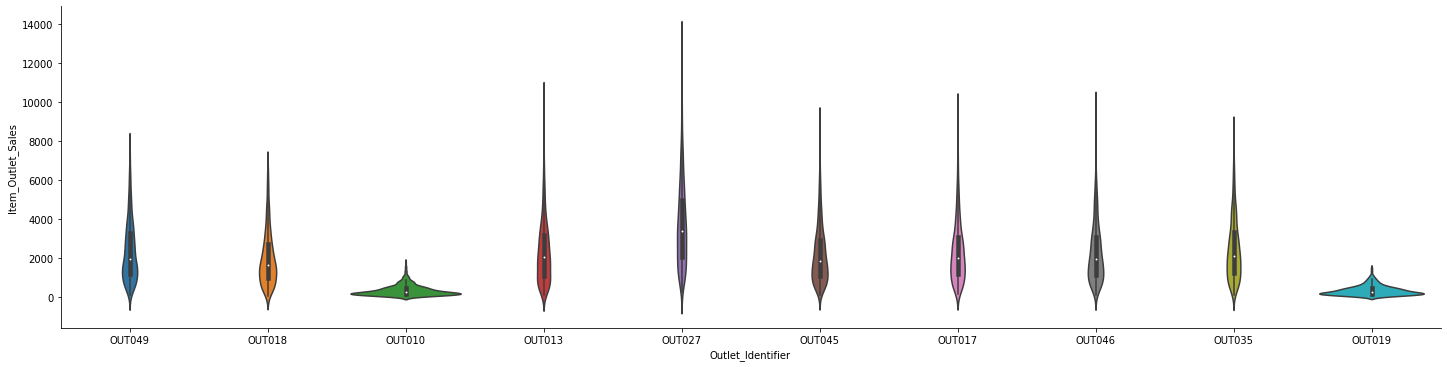

In [ ]:
sns.catplot(x='Outlet_Identifier', y='Item_Outlet_Sales', kind='violin', data=df, aspect=4)

   4. **`Outlet_Size`**

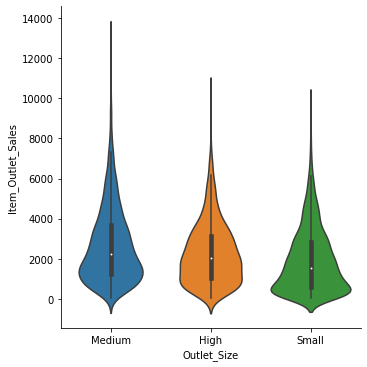

In [ ]:
sns.catplot(x='Outlet_Size', y='Item_Outlet_Sales', kind='violin', data=df)

   5. **`Outlet_Type`**

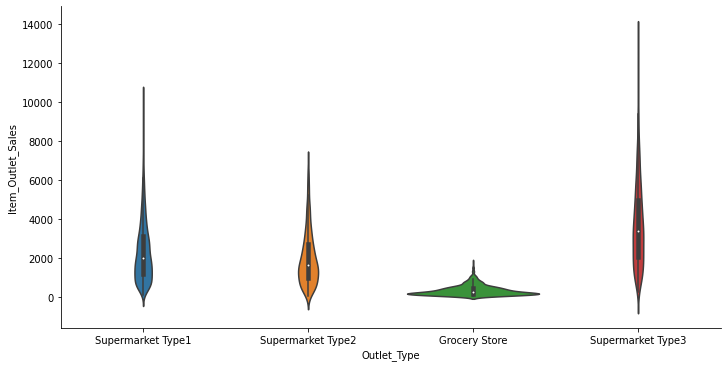

In [ ]:
sns.catplot(x='Outlet_Type', y='Item_Outlet_Sales', kind='violin', data=df, aspect=2)

   6. **`Outlet_Location_Type`**

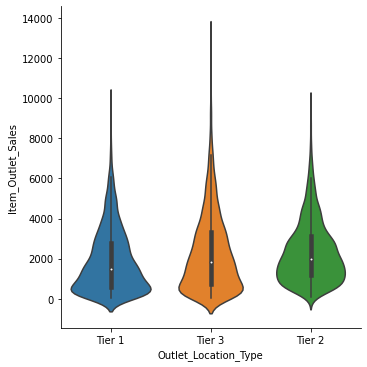

In [ ]:
sns.catplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, kind='violin')

   **Observations**
1. Low Fat and Regular classes of `Item_Fat_Content` look similar and not distinct just like the distribution of `Item_Outlet_Sales` for `Item_Type`
2. OUT010 and OUT019 identifiers are similar in distriution for `Item_Outlet_Sales` but very different from the rest
3. Tier 1 and Tier 2 locations of `Outlet_Location_Type` are similar in distribution for `Item_Outlet_Sales`
4. Grocery Store type has its distribution at lower `Item_Outlet_Sales`

## **Data Processing**

#### Imputing Missing Data
For continuous features the mode, median, and mean can be used but for categorical features the mode or a selected value can be used to impute missing values.

In [ ]:
# Finding columns with missing values
df.isna().sum(), df_test.isna().sum()

(Item_Identifier                 0
 Item_Weight                  1463
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  2410
 Outlet_Location_Type            0
 Outlet_Type                     0
 Item_Outlet_Sales               0
 dtype: int64, Item_Identifier                 0
 Item_Weight                   976
 Item_Fat_Content                0
 Item_Visibility                 0
 Item_Type                       0
 Item_MRP                        0
 Outlet_Identifier               0
 Outlet_Establishment_Year       0
 Outlet_Size                  1606
 Outlet_Location_Type            0
 Outlet_Type                     0
 dtype: int64)

   **Observations**
1. Only 2 features (`Item_Weight` and `Outlet_Size`) have missing values and for the `Item_Weight` we will employ the _mean_ to impute the missing values and for the `Outlet_Size` we will employ the _mode_ for both the train and test datasets.

In [ ]:
#Imputing Missing Values in the Item Weight Feature
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

df['Item_Weight'].isna().sum(), df_test['Item_Weight'].isna().sum()

(0, 0)

In [ ]:
#Imputing Missing Values in the Outlet_Size Feature

df['Outlet_Size'].fillna('Medium', inplace=True)
df_test['Outlet_Size'].fillna('Medium', inplace=True)

df['Outlet_Size'].isna().sum(), df_test['Outlet_Size'].isna().sum()

(0, 0)

#### Replacing Zero Values in the `Item_Visibility` Feature

In [ ]:
a = df[df['Item_Visibility'] != 0.0]['Item_Visibility'].median()

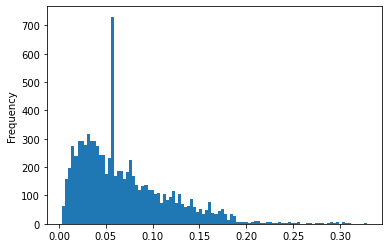

In [ ]:
df['Item_Visibility'] = df['Item_Visibility'].replace(0.00, a)
df['Item_Visibility'].plot(kind='hist', bins=100)

#### Feature Engineering

This will involve creating new features that will offer more value in terms of predicting sales.The new feature will be:
1. Age: Years of operation considering the dataset is dated 2013
2. PpW: Item_MRP/Item_Weight
3. Item_Kind: Perishable or Not_Perishable from Item_Type
4. Item_Cate: From the Item_Identifier
5. IPC(Item_Price_Class): Binned Item_MRP

**1. Age**

In [ ]:
df['Age'] = 2013 - df['Outlet_Establishment_Year']
df_test['Age'] = 2013 - df_test['Outlet_Establishment_Year']
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,FDX07,19.20,Regular,0.057792,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,NCD19,8.93,Low Fat,0.057792,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


**2. PpW**

In [ ]:
df['PpW'] = df['Item_MRP']/df['Item_Weight']
df_test['PpW'] = df_test['Item_MRP']/df['Item_Weight']
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,PpW
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,8.092457
3,FDX07,19.20,Regular,0.057792,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15,9.484115
4,NCD19,8.93,Low Fat,0.057792,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,6.031512


**3. Item_Kind**

In [ ]:
def kindify(X, feature):
    perishable = ["Breads", "Breakfast", "Dairy", "Fruits and Vegetables", "Meat", "Seafood"]
    non_perishable = ["Baking Goods", "Canned", "Frozen Foods", "Hard Drinks", "Health and Hygiene", 
                      "Household", "Soft Drinks"]
    kind_list = []
    for i in X[feature]:
        if (i in perishable):
            kind_list.append('P')
        elif (i in non_perishable):
            kind_list.append('NP')
        else:
            kind_list.append('NS')
    return kind_list

In [ ]:
x = kindify(df, 'Item_Type')
df['Item_Kind'] = x
t = kindify(df_test, 'Item_Type')
df_test['Item_Kind'] = t
df.head(10)[['Item_Type', 'Item_Kind']]

,Item_Type,Item_Kind
0,Dairy,P
1,Soft Drinks,NP
2,Meat,P
3,Fruits and Vegetables,P
4,Household,NP
5,Baking Goods,NP
6,Snack Foods,NS
7,Snack Foods,NS
8,Frozen Foods,NP
9,Frozen Foods,NP


**4. Item_Cate**

In [ ]:
df['Item_Cate'] = df['Item_Identifier'].replace({'^DR[A-Z]*[0-9]*': 'DR', 
                                                 '^FD[A-Z]*[0-9]*': 'FD', '^NC[A-Z]*[0-9]*': 'NC'}, regex=True)
df_test['Item_Cate'] = df_test['Item_Identifier'].replace({'^DR[A-Z]*[0-9]*': 'DR', 
                                                 '^FD[A-Z]*[0-9]*': 'FD', '^NC[A-Z]*[0-9]*': 'NC'}, regex=True)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Age,PpW,Item_Kind,Item_Cate
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14,26.861204,P,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4,8.153581,NP,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14,8.092457,P,FD
3,FDX07,19.20,Regular,0.057792,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15,9.484115,P,FD
4,NCD19,8.93,Low Fat,0.057792,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26,6.031512,NP,NC


In [ ]:
df.groupby(['Item_Type'])['Item_Cate'].value_counts().unstack()

Item_Cate,DR,FD,NC
Item_Type,,,
Baking Goods,NaN,648.0,NaN
Breads,NaN,251.0,NaN
Breakfast,NaN,110.0,NaN
Canned,NaN,649.0,NaN
Dairy,140.0,542.0,NaN
Frozen Foods,NaN,856.0,NaN
Fruits and Vegetables,NaN,1232.0,NaN
Hard Drinks,214.0,NaN,NaN
Health and Hygiene,NaN,NaN,520.0


**Observations**

From the new Feature `Item_Cate` and crosstabbing it with `Item_Type` we realise Health and Hygiene, Household, Others are not consumable from their categorisation NC. This then will introduce a new class in `Item_Fat_Content` known as Not Edible.

In [ ]:
df['Item_Fat_Content'][df['Item_Cate'] == 'NC'] = 'Not Edible'
df_test['Item_Fat_Content'][df_test['Item_Cate'] == 'NC'] = 'Not Edible'
df['Item_Fat_Content'].unique(), df_test['Item_Fat_Content'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array(['Low Fat', 'Regular', 'Not Edible'], dtype=object),
 array(['Low Fat', 'Regular', 'Not Edible'], dtype=object))

**5. IPC(Item_Price_Class)**

In [ ]:
def price_classing(X):
    if X<70:
        return '1'
    elif X in range(70, 136):
        return '2'
    elif X in range(136, 203):
        return '3'
    elif X>= 203:
        return '4'

In [ ]:
df['IPC'] = df['Item_MRP'].astype(int).apply(price_classing)
df_test['IPC'] = df_test['Item_MRP'].astype(int).apply(price_classing)

#### Encoding Categorical Features
##### Ordinal Features
1. `Item_Fat_Content`
2. `Outlet_Size`
3. `Outlet_Location_Type`


##### Non-Ordinal Features
1. `Outlet_Type`
2. `Item_Cate`
3. `Item_Kind`

The Ordinal Features will undergo Label Encoding
The Non-ordinal will undergo One Hot Encoding
NB: For common encoding both train and test data have to be concatenated.

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

fatle = LabelEncoder() #Label Encoder for Item_Fat_Content
fatle.fit(df['Item_Fat_Content']) 
sizele = LabelEncoder() #Label Encoder for Outlet_Size
sizele.fit(df['Outlet_Size'])
locle = LabelEncoder() #Label Encoder for Outlet_Location_Type
locle.fit(df['Outlet_Location_Type'])

LabelEncoder()

In [ ]:
df['Item_Fat_Content'] = fatle.transform(df['Item_Fat_Content'])

In [ ]:
df['Outlet_Size'] = sizele.transform(df['Outlet_Size'])

In [ ]:
df['Outlet_Location_Type'] = locle.transform(df['Outlet_Location_Type'])

In [ ]:
# One Hot Encoding
dumm = pd.get_dummies(df[['Outlet_Identifier', 'Outlet_Type', 'Item_Kind', 'Item_Cate']])
dumm.head()

,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Kind_NP,Item_Kind_NS,Item_Kind_P,Item_Cate_DR,Item_Cate_FD,Item_Cate_NC
0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [ ]:

train = pd.concat([df.drop(['Outlet_Identifier', 'Outlet_Type', 'Item_Kind', 'Item_Cate'], axis=1), dumm], axis=1)
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Item_Outlet_Sales', 'Age', 'PpW', 'IPC',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3',
       'Item_Kind_NP', 'Item_Kind_NS', 'Item_Kind_P', 'Item_Cate_DR',
       'Item_Cate_FD', 'Item_Cate_NC'],
      dtype='object')

#### Checking for Skewness Across all Features and Removal

In [ ]:
num_cols = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales', 'Age', 'PpW', 'IPC']
check_skew(train, num_cols)

Item_Weight 0.09056145191764828
Item_Visibility 1.3108710064920657
Item_MRP 0.1272022683110526
Item_Outlet_Sales 1.1775306028542798
Age 0.39664078591553986
PpW 1.328333142527635
IPC -0.05043634828455482


**Observation**

`Item_Visibility`, `Item_Outlet_Sales`, `PpW` are marked for removal of skewness considering it is more than 0.5 currently. The removal will be done via log transformation.

In [ ]:
def rem_skew(X, attrib):
    X_ = X.copy()
    for i in attrib:
        X_[i] = np.log10(X_[i])
    return X_

In [ ]:
atr = ['Item_Visibility','Item_Outlet_Sales', 'PpW']
df1 = rem_skew(train, atr)

In [ ]:
check_skew(df1, num_cols)

Item_Weight 0.09056145191764828
Item_Visibility -0.4560932382650879
Item_MRP 0.1272022683110526
Item_Outlet_Sales -0.8877533432093067
Age 0.39664078591553986
PpW -0.3234849796448371
IPC -0.05043634828455482


In [ ]:
df1[['Item_Visibility','Item_Outlet_Sales', 'PpW']]

,Item_Visibility,Item_Outlet_Sales,PpW
0,-1.794598,3.572307,1.429125
1,-1.714933,2.646818,0.911348
2,-1.775724,3.321654,0.908080
3,-1.238130,2.864736,0.976997
4,-1.238130,2.997694,0.780426
...,...,...,...
8518,-1.245779,3.443792,1.494831
8519,-1.328065,2.739798,1.110811
8520,-1.453627,3.076682,0.904738
8521,-0.837972,3.266137,1.155463


In [ ]:
corr_matrix=df1.corr()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales                1.000000
Item_MRP                         0.509671
PpW                              0.440636
Outlet_Type_Supermarket Type1    0.286777
Outlet_Identifier_OUT027         0.251612
Outlet_Type_Supermarket Type3    0.251612
Outlet_Identifier_OUT035         0.094788
Outlet_Identifier_OUT049         0.080285
Outlet_Establishment_Year        0.077240
Outlet_Identifier_OUT017         0.075803
Outlet_Identifier_OUT046         0.069830
Outlet_Identifier_OUT013         0.061532
Outlet_Location_Type             0.058978
Outlet_Identifier_OUT045         0.055308
Item_Cate_FD                     0.024400
Item_Kind_NS                     0.022475
Outlet_Type_Supermarket Type2    0.011895
Outlet_Identifier_OUT018         0.011895
Item_Fat_Content                 0.011022
Item_Kind_P                      0.009411
Item_Weight                      0.008050
Item_Cate_NC                    -0.004791
Item_Kind_NP                    -0.026004
Item_Cate_DR                    -0

## **Exploring Models and Selecting the Best**
We will explore the following models and select the best to predict the item sales:
1. Ridge
2. Elastic Net
3. Decision Trees
4. Random Forest
5. XGBoost

We will use Root Mean Squared Error to select the best model.

In [ ]:
# First: To split data into train and validation sets

from sklearn.model_selection import train_test_split
X = df1.drop(['Outlet_Establishment_Year', 'Item_Identifier',
              'Item_Outlet_Sales', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size'], axis=1)
target = df1['Item_Outlet_Sales']

X_train, X_valid, target_train, target_valid = train_test_split(X, target, test_size = 0.25, random_state=42)
X_train['IPC'] = X_train['IPC'].astype(int)
X_train.shape,X_valid.shape,target_train.shape,target_valid.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


((6392, 27), (2131, 27), (6392,), (2131,))

**1. Ridge**

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
%time
from sklearn.linear_model import Ridge
rid_reg = Ridge()
rid_reg.fit(X_train, target_train)
predicts_rid = rid_reg.predict(X_train)
rid_mse = mean_squared_error(target_train, predicts_rid)
rid_rmse = np.sqrt(rid_mse)
print(rid_rmse)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 8.34 µs
0.22588009109962018


**2. Elastic Net**

In [ ]:
%time
from sklearn.linear_model import ElasticNet
en_reg = ElasticNet()
en_reg.fit(X_train, target_train)
predicts_en = en_reg.predict(X_train)
en_mse = mean_squared_error(target_train,predicts_en)
en_rmse = np.sqrt(en_mse)
print(en_rmse)

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 7.63 µs
0.37807920373254733


**3. Decision Tree**

In [ ]:
%time
from sklearn.tree import DecisionTreeRegressor
dct_reg = DecisionTreeRegressor()
dct_reg.fit(X_train, target_train)
predicts_dct = dct_reg.predict(X_train)
dct_mse = mean_squared_error(target_train, predicts_dct)
dct_rmse = np.sqrt(dct_mse)
print(dct_rmse)

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 6.91 µs
1.1345127731846707e-05


**4. Random Forest**

In [ ]:
%time
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, target_train)
predicts_rf = rf_reg.predict(X_train)
rf_mse = mean_squared_error(target_train, predicts_rf)
rf_rmse = np.sqrt(rf_mse)
print(rf_rmse)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
0.09008766618182489


**5. XGBoost**

In [ ]:
%time
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(objective='reg:squarederror')
xgb_reg.fit(X_train, target_train)
predicts_xgb= xgb_reg.predict(X_train)
xgb_mse = mean_squared_error(target_train, predicts_xgb)
xgb_rmse = np.sqrt(xgb_mse)
print(xgb_rmse)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs
0.21643767804025604


**Observation**
1. With only one fold, all the algorithms have a considerably low RMSE
Therefore, we will do a further test with cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print('Scores: ', scores)
    print('Mean Score: ', scores.mean())
    print('Std: ', scores.std())

In [ ]:
%time
scores_rid = cross_val_score(rid_reg, X_train, target_train, scoring = 'neg_mean_squared_error', cv=10)
rid_scores_rmse = np.sqrt(-scores_rid)
display_scores(rid_scores_rmse)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs
Scores:  [0.22251273 0.22346535 0.23249255 0.23236559 0.23182948 0.23070317
 0.21884499 0.22564148 0.22724086 0.21974981]
Mean Score:  0.22648460045847743
Std:  0.004969316719163363


In [ ]:
%time
scores_en = cross_val_score(en_reg, X_train, target_train, scoring = 'neg_mean_squared_error', cv=10)
en_scores_rmse = np.sqrt(-scores_en)
display_scores(en_scores_rmse)

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 9.54 µs
Scores:  [0.38619989 0.39143663 0.36043781 0.38327298 0.38850156 0.36771975
 0.35580683 0.40227369 0.37279008 0.37041817]
Mean Score:  0.3778857393542137
Std:  0.014022224717982305


In [ ]:
%time
scores_dct = cross_val_score(dct_reg, X_train, target_train, scoring = 'neg_mean_squared_error', cv=10)
dct_scores_rmse = np.sqrt(-scores_dct)
display_scores(dct_scores_rmse)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs
Scores:  [0.32403609 0.32426782 0.31824185 0.32626487 0.31847671 0.30960889
 0.33343238 0.32294422 0.32722317 0.31465199]
Mean Score:  0.3219147985116709
Std:  0.006483422407408354


In [ ]:
%time
scores_rf = cross_val_score(rf_reg, X_train, target_train, scoring = 'neg_mean_squared_error', cv=10)
rf_scores_rmse = np.sqrt(-scores_rf)
display_scores(rf_scores_rmse)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
Scores:  [0.23401562 0.23446907 0.24352098 0.2498884  0.24480758 0.240677
 0.23396894 0.24166405 0.24218095 0.23666198]
Mean Score:  0.2401854573607754
Std:  0.005048273170885901


In [ ]:
%time
scores_xgb = cross_val_score(xgb_reg, X_train, target_train, scoring = 'neg_mean_squared_error', cv=10)
xgb_scores_rmse = np.sqrt(-scores_xgb)
display_scores(xgb_scores_rmse)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs
Scores:  [0.22212057 0.22450685 0.23293004 0.23596974 0.22965658 0.22921367
 0.22031229 0.22569329 0.22888273 0.22094939]
Mean Score:  0.22702351429501047
Std:  0.004941518295592949


**Observation**

The one fold for Random Forest, XGBoost and Decision Tree gave a wrong impression to be performing better. For 10 Folds, there is a change.

From the 5 algorithms, we select Ridge, Random Forest, and XGBoost to perform a GridSearch

#### **HyperTuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

model_params = {
    'Ridge':{
        'model': Ridge(),
        'params':{
            'max_iter': [1000],
            'solver':['lsqr', 'sag']
        }
    },
    'Random_Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [100, 250],
            'criterion':['mse', 'mae'],
            'max_features': ['sqrt', 'log2'],
            'bootstrap': [False, True]
        }
    },
    'XGBoost':{
        'model': XGBRegressor(),
        'params':{
            'n_estimators': [50, 75, 100],
            'objective': ['reg:squarederror'],
            'booster': ['dart', 'gbtree'],
            'eta': [0.05, 0.1],
        }
    }
}

In [ ]:
%time
scores = []
for model_name, mp in model_params.items():
    rgsr = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    rgsr.fit(X_train, target_train)
    scores.append({
        'model': model_name,
        'best_score': rgsr.best_score_,
        'best_params': rgsr.best_params_
    })

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [ ]:
results = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
results

,model,best_score,best_params
0,Ridge,0.731103,"{'max_iter': 1000, 'solver': 'sag'}"
1,Random_Forest,0.711727,"{'bootstrap': True, 'criterion': 'mae', 'max_f..."
2,XGBoost,0.733154,"{'booster': 'dart', 'eta': 0.05, 'n_estimators..."


#### Evaluating the Model with the Validation Data

In [ ]:
final_model = rgsr.best_estimator_
X_valid['IPC'] = X_valid['IPC'].astype(int)

valid_predictions = final_model.predict(X_valid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
print(final_model.score(X_valid, target_valid))
print(np.sqrt(mean_squared_error(target_valid, valid_predictions)))

0.7390842580009445
0.2280499977593007


**Observations**

The accuracy of the XGBoost is the best estimator and is consistent in its RMSE. We will use the model to predict *Item_Outlet_Sales* in the test data.

#### Prediction of *Item_Outlet_Sales* in the Test Data Provided

In [ ]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,PpW,Item_Kind,Item_Cate,IPC
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,14,11.598086,NS,FD,2
1,FDW14,8.300000,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,6,14.749966,P,FD,2
2,NCN55,14.600000,Not Edible,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,15,13.814503,NS,NC,4
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,6,8.074687,NS,FD,3
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,28,26.229563,P,FD,4


In [ ]:
test_df = df_test.copy()
test_df['Item_Fat_Content'] = fatle.transform(test_df['Item_Fat_Content'])
test_df['Outlet_Size'] = sizele.transform(test_df['Outlet_Size'])
test_df['Outlet_Location_Type'] = locle.transform(test_df['Outlet_Location_Type'])

In [ ]:
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Age,PpW,Item_Kind,Item_Cate,IPC
0,FDW58,20.750000,0,0.007565,Snack Foods,107.8622,OUT049,1999,1,0,Supermarket Type1,14,11.598086,NS,FD,2
1,FDW14,8.300000,2,0.038428,Dairy,87.3198,OUT017,2007,1,1,Supermarket Type1,6,14.749966,P,FD,2
2,NCN55,14.600000,1,0.099575,Others,241.7538,OUT010,1998,1,2,Grocery Store,15,13.814503,NS,NC,4
3,FDQ58,7.315000,0,0.015388,Snack Foods,155.0340,OUT017,2007,1,1,Supermarket Type1,6,8.074687,NS,FD,3
4,FDY38,12.695633,2,0.118599,Dairy,234.2300,OUT027,1985,1,2,Supermarket Type3,28,26.229563,P,FD,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,2,0.013496,Snack Foods,141.3154,OUT046,1997,2,0,Supermarket Type1,16,9.358636,NS,FD,3
5677,FDD47,7.600000,2,0.142991,Starchy Foods,169.1448,OUT018,2009,1,2,Supermarket Type2,4,13.921383,NS,FD,3
5678,NCO17,10.000000,1,0.073529,Health and Hygiene,118.7440,OUT045,2002,1,1,Supermarket Type1,11,11.102758,NP,NC,2
5679,FDJ26,15.300000,2,0.000000,Canned,214.6218,OUT017,2007,1,1,Supermarket Type1,6,16.692155,NP,FD,4


In [ ]:
dummy = pd.get_dummies(test_df[['Outlet_Identifier', 'Outlet_Type', 'Item_Kind', 'Item_Cate']])
dummy

,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Kind_NP,Item_Kind_NS,Item_Kind_P,Item_Cate_DR,Item_Cate_FD,Item_Cate_NC
0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
5677,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
5678,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
5679,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
test = pd.concat([test_df.drop(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Type', 'Item_Kind', 'Item_Cate', 'Item_Fat_Content', 'Outlet_Size'], axis=1), dummy], axis=1)
test['IPC'] = test['IPC'].astype(int)
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Location_Type,Age,PpW,IPC,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Kind_NP,Item_Kind_NS,Item_Kind_P,Item_Cate_DR,Item_Cate_FD,Item_Cate_NC
0,20.750000,0.007565,107.8622,0,14,11.598086,2,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0
1,8.300000,0.038428,87.3198,1,6,14.749966,2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
2,14.600000,0.099575,241.7538,2,15,13.814503,4,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3,7.315000,0.015388,155.0340,1,6,8.074687,3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,12.695633,0.118599,234.2300,2,28,26.229563,4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [ ]:
# Predicting Item_Outlet_Sales

predicted_test = final_model.predict(test)

4776    2.712085
7510    3.485156
5828    3.198092
5327    3.124374
4810    3.227150
          ...   
5734    2.448656
5191    3.114491
5390    3.788545
860     3.217445
7270    2.984712
Name: Item_Outlet_Sales, Length: 6392, dtype: float64

In [ ]:
num_cols2 = num_cols.copy()
num_cols2.remove('Item_Outlet_Sales')
check_skew(test, num_cols2)

Item_Weight 0.14281331679327391
Item_Visibility 1.2383124276598974
Item_MRP 0.13618153880370937
Age 0.3963064722562343
PpW 1.4097497508719727
IPC -0.020049768099744174


In [ ]:
atr2 =['Item_Visibility', 'PpW']
test1 = rem_skew(test, atr2)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
predicted_test2 = final_model.predict(test1)

In [ ]:
pred1 = pd.DataFrame(predicted_test, columns=['Item_Outlet_Sales'])
pred2 = pd.DataFrame(predicted_test2, columns=['Removed_Skew_Item_Outlet_Sales'])
compare_df = pd.concat([pred1, pred2], axis=1)
compare_df.head()

,Item_Outlet_Sales,Removed_Skew_Item_Outlet_Sales
0,3.229101,3.172332
1,3.157925,3.113757
2,2.813694,2.720876
3,3.397231,3.334538
4,3.775383,3.733177


In [ ]:
def inverse_log10(X, parm):
  X_ = X.copy()
  for i in parm:
    X_[i] = 10 ** X_[i]

  return X_

In [ ]:
final_sales = inverse_log10(compare_df, ['Item_Outlet_Sales', 'Removed_Skew_Item_Outlet_Sales'])
final_sales.head()

,Item_Outlet_Sales,Removed_Skew_Item_Outlet_Sales
0,1694.730713,1487.071411
1,1438.550537,1299.442017
2,651.169067,525.866516
3,2495.919678,2160.416504
4,5961.873535,5409.747070
